In [ ]:
# ! pip install kagglehub


In [ ]:
# import kagglehub

# path = kagglehub.dataset_download("lotusacharya/nepalinewsdataset")
# print("Path to dataset files:", path)


In [ ]:
# import os
# import pandas as pd

# BASE_DIR = r"C:\Users\ACER\.cache\kagglehub\datasets\lotusacharya\nepalinewsdataset\versions\4"

# data = []

# for label in os.listdir(BASE_DIR):
#     level1 = os.path.join(BASE_DIR, label)

#     if not os.path.isdir(level1):
#         continue

#     level2 = os.path.join(level1, label)  # second nested folder

#     if not os.path.isdir(level2):
#         continue

#     for filename in os.listdir(level2):
#         file_path = os.path.join(level2, filename)

#         if os.path.isfile(file_path):
#             with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
#                 text = f.read().strip()

#                 if text:
#                     data.append({
#                         "text": text,
#                         "label": label
#                     })

# df = pd.DataFrame(data)

# print("Total samples:", len(df))
# print("Unique labels:", df['label'].nunique())
# print(df['label'].value_counts())

# df.to_csv("nepali_news.csv", index=False, encoding="utf-8")


In [ ]:
# import os

# DATASET_DIR = r"C:\Users\ACER\.cache\kagglehub\datasets\lotusacharya\nepalinewsdataset\versions\4"

# for label in os.listdir(DATASET_DIR):
#     label_path = os.path.join(DATASET_DIR, label)
#     if os.path.isdir(label_path):
#         print(label, "→", os.listdir(label_path)[:5])


In [1]:
import pandas as pd

df = pd.read_csv("nepali_news.csv")

# 🔥 MANDATORY SHUFFLE
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [4]:
df

,text,label
0,"कार्टुन र समाज""पछिल्लो समय पत्रकारिताका विभिन्...",Sahitya
1,"ताप लिएर शारदा""लेखिका शारदा शर्मा सोमबार पात्र...",Manoranjan
2,नीलो पार्टीको रातो पार्टीमा विलय निर्वाचन सामन...,Bichar
3,"""लाखे बालामैचा र बुख्याँचा """"ए धनबहादुर दाइ मै...",Manoranjan
4,सोनाक्षीको हया्ट्रिकबलिउडमा सोनाक्षी सिन्हा भा...,Manoranjan
...,...,...
9995,ओमनमा नेपालीद्वारा आत्महत्याओमनको राजधानी मस्क...,Prabas
9996,अमेरिकी एनआरएनद्धारा राजदुतलाई ज्ञापनपत्रसंविध...,Prabas
9997,माओवादी नेतालाई भारतमा सफाइभारतको बिहार राज्यस...,Prabas
9998,प्रभावकारी भए साना ट्युबेलबाँके र बर्दियामा मह...,ArthaBanijya


In [2]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df["text"] = df["text"].apply(clean_text)


In [6]:
df.head()

,text,label
0,"कार्टुन र समाज""पछिल्लो समय पत्रकारिताका विभिन्...",Sahitya
1,"ताप लिएर शारदा""लेखिका शारदा शर्मा सोमबार पात्र...",Manoranjan
2,नीलो पार्टीको रातो पार्टीमा विलय निर्वाचन सामन...,Bichar
3,"""लाखे बालामैचा र बुख्याँचा """"ए धनबहादुर दाइ मै...",Manoranjan
4,सोनाक्षीको हया्ट्रिकबलिउडमा सोनाक्षी सिन्हा भा...,Manoranjan


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)


print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 8000
Test samples: 2000


# LogisticRegression

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# model = Pipeline([
#     ("tfidf", TfidfVectorizer(
#         ngram_range=(1,3),
#         max_features=80000,
#         sublinear_tf=True,
#         min_df=3
#     )),
#     ("clf", LogisticRegression(
#         max_iter=1000,
#         n_jobs=-1,
#         solver="lbfgs",
#         multi_class="auto"
#     ))
# ])

# model.fit(X_train, y_train)


In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8645
                 precision    recall  f1-score   support

   ArthaBanijya       0.86      0.85      0.86       200
         Bichar       0.89      0.94      0.91       200
           Desh       0.82      0.90      0.86       200
        Khelkud       0.99      0.97      0.98       200
     Manoranjan       0.74      0.74      0.74       200
         Prabas       0.86      0.78      0.81       200
        Sahitya       0.74      0.77      0.75       200
SuchanaPrabidhi       0.93      0.85      0.89       200
       Swasthya       0.94      0.93      0.93       200
          Viswa       0.89      0.92      0.91       200

       accuracy                           0.86      2000
      macro avg       0.87      0.86      0.86      2000
   weighted avg       0.87      0.86      0.86      2000



# Multinomial

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline
# MultinomialNB(alpha=0.5)

# nb_model = make_pipeline(
#     TfidfVectorizer(
#         ngram_range=(1,2),
#         max_features=50000,
#         min_df=3,
#         sublinear_tf=True
#     ),
#     MultinomialNB(alpha=0.5)
# )

# nb_model.fit(X_train, y_train)
# y_nb_pred = nb_model.predict(X_test)

In [ ]:
# # Accuracy
# print(f"Accuracy: {accuracy_score(y_test,y_nb_pred)*100:.2f}%")

# # Detailed classification report
# print(classification_report(y_test, y_nb_pred))

Accuracy: 83.25%
                 precision    recall  f1-score   support

   ArthaBanijya       0.73      0.92      0.81       200
         Bichar       0.66      0.97      0.79       200
           Desh       0.93      0.69      0.79       200
        Khelkud       0.99      0.94      0.97       200
     Manoranjan       0.78      0.70      0.74       200
         Prabas       0.87      0.73      0.80       200
        Sahitya       0.73      0.78      0.75       200
SuchanaPrabidhi       0.96      0.84      0.90       200
       Swasthya       0.92      0.93      0.92       200
          Viswa       0.92      0.83      0.87       200

       accuracy                           0.83      2000
      macro avg       0.85      0.83      0.83      2000
   weighted avg       0.85      0.83      0.83      2000



# Linear SVM (TF-IDF)
LinearSVC handles high-dimensional sparse text extremely well

TF-IDF + bigrams captures Nepali phrase structure

sublinear_tf=True stabilizes frequent news words

min_df=3 removes garbage tokens

In [7]:
# Word-level TF-IDF
from sklearn.pipeline import FeatureUnion, Pipeline
tfidf_word = TfidfVectorizer(
    ngram_range=(1,3),      # unigrams + bigrams
    max_features=50000,
    min_df=3,
    sublinear_tf=True
)

# Character-level TF-IDF
tfidf_char = TfidfVectorizer(
    analyzer="char_wb",
    ngram_range=(3,6),
    min_df=3
)

# Combine them
hybrid_features = FeatureUnion([
    ("word", tfidf_word),
    ("char", tfidf_char)
])


In [8]:

from sklearn.calibration import LinearSVC


svm_hybrid = Pipeline([
    ("features", hybrid_features),
    ("clf", LinearSVC(C=2.0, max_iter=8000))
])


In [9]:
svm_hybrid.fit(X_train.tolist(), y_train)


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('word',
                                                 TfidfVectorizer(max_features=50000,
                                                                 min_df=3,
                                                                 ngram_range=(1,
                                                                              3),
                                                                 sublinear_tf=True)),
                                                ('char',
                                                 TfidfVectorizer(analyzer='char_wb',
                                                                 min_df=3,
                                                                 ngram_range=(3,
                                                                              6)))])),
                ('clf', LinearSVC(C=2.0, max_iter=8000))])

In [10]:
y_s_pred = svm_hybrid.predict(X_test.tolist())
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_s_pred))
print(classification_report(y_test, y_s_pred))


Accuracy: 0.897
                 precision    recall  f1-score   support

   ArthaBanijya       0.90      0.92      0.91       200
         Bichar       0.93      0.93      0.93       200
           Desh       0.92      0.91      0.91       200
        Khelkud       0.98      0.98      0.98       200
     Manoranjan       0.80      0.74      0.77       200
         Prabas       0.89      0.85      0.87       200
        Sahitya       0.75      0.82      0.78       200
SuchanaPrabidhi       0.94      0.91      0.92       200
       Swasthya       0.96      0.97      0.97       200
          Viswa       0.92      0.94      0.93       200

       accuracy                           0.90      2000
      macro avg       0.90      0.90      0.90      2000
   weighted avg       0.90      0.90      0.90      2000



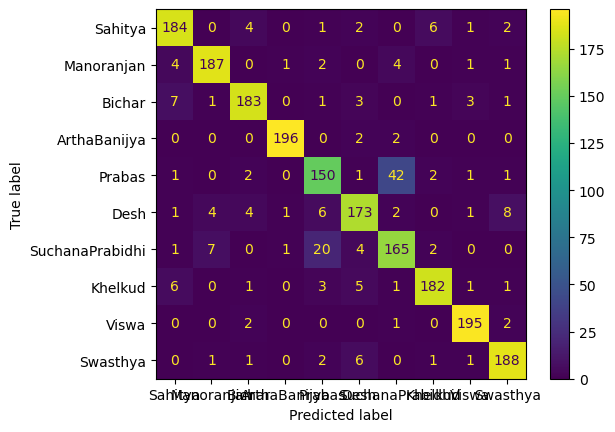

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Confusion matrix
cm = confusion_matrix(y_test, y_s_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['label'].unique())
cm_plot.plot()
plt.show()

In [12]:
sample_texts = [
    """अस्ट्रेलियाको क्यानबेरा उच्च न्यायालयले समलिंगी बिहेका लागि अनुमति दिने स्थानीय कानुनविरुद्ध फैसला गरेको छ।
    अस्ट्रेलियाली राजधानी क्षेत्र एसीटीको संसद्ले गत वर्षको अक्टोबरमा यस्तो बिहेको अनुमति दिने विधेयक पारित गरेको थियो।
    राष्ट्रिय सरकारले संघीय कानुनसँग मेल नखाने भन्दै यसलाई चुनौती दिएको थियो।
    संघीय कानुनले पुरुष र महिलाबीचको विवाहलाई मात्र वैध ठहर गरेको छ।
    प्रधानमन्त्री टोनी एबोटले पनि समलिंगी बिहेको विरोध गरेका छन्।
    क्यानाडा, फ्रान्स, अर्जेन्टिना र दक्षिण अफ्रिकामा भने यस्तो बिहेलाई कानुनी मान्यता छ।"""
]


predictions = svm_hybrid.predict(sample_texts)
for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text}\nPredicted Category: {pred}\n")


Text: अस्ट्रेलियाको क्यानबेरा उच्च न्यायालयले समलिंगी बिहेका लागि अनुमति दिने स्थानीय कानुनविरुद्ध फैसला गरेको छ।
    अस्ट्रेलियाली राजधानी क्षेत्र एसीटीको संसद्ले गत वर्षको अक्टोबरमा यस्तो बिहेको अनुमति दिने विधेयक पारित गरेको थियो।
    राष्ट्रिय सरकारले संघीय कानुनसँग मेल नखाने भन्दै यसलाई चुनौती दिएको थियो।
    संघीय कानुनले पुरुष र महिलाबीचको विवाहलाई मात्र वैध ठहर गरेको छ।
    प्रधानमन्त्री टोनी एबोटले पनि समलिंगी बिहेको विरोध गरेका छन्।
    क्यानाडा, फ्रान्स, अर्जेन्टिना र दक्षिण अफ्रिकामा भने यस्तो बिहेलाई कानुनी मान्यता छ।
Predicted Category: Viswa



In [ ]:
# import joblib
# joblib.dump(svm_hybrid, 'svm_hybrid.joblib')
# print('SUCCESS')

SUCCESS


In [11]:
import joblib

joblib.dump(
    svm_hybrid,            # <-- use the correct variable name
    "svm_hybrid.joblib",
    compress=3
)
print("SUCCESS")


SUCCESS
